In [1]:
import pandas as pd

df = pd.read_csv('./titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. head() 和 info() 不足以观察出数据的特征

In [24]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [25]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [26]:
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

### 先研究年龄的分布，和年龄与其他变量的关系，最后填充缺失的年龄值

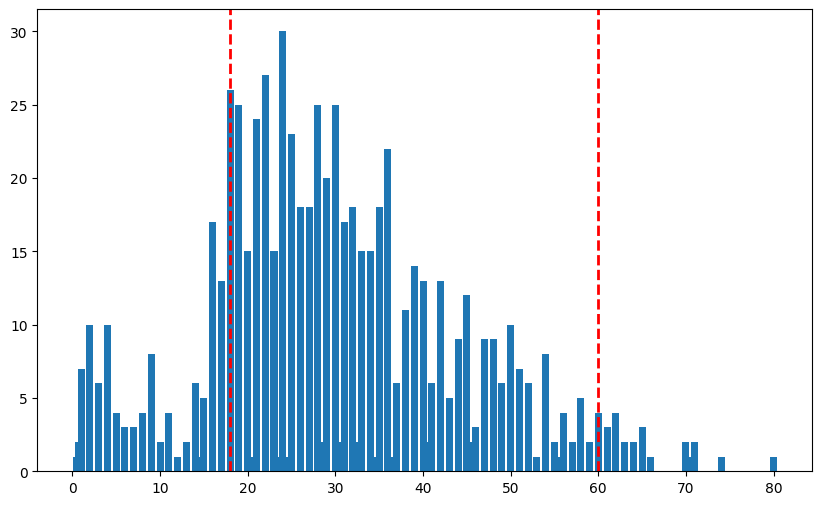

In [3]:
import matplotlib.pyplot as plt
age_series = df['Age'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.bar(age_series.index, age_series.values)
plt.axvline(x=18, color='r', linestyle='--',linewidth=2)
plt.axvline(x=60,color='red',linestyle='--',linewidth=2)
plt.show()

In [4]:
# 找到年龄的缺失值并进行填充
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 去除掉无用列

In [5]:
df.drop(['Name','Cabin','PassengerId','Ticket','Embarked'],axis=1,inplace=True)

In [6]:
# 处理之后的数据
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


### 判断各个特征之间的相关性
1. 票的价格越高，生存的概率就越大
2. 性别与生存的联系也很高
3. pclass越高，即票价越低，生存的概率就越小

In [7]:
# 如果是男性则为0，女性为1
df['Sex'] = df['Sex'].map({'male':0,'female':1})
print(df['Sex'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


In [8]:
corr_matrix = df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Sex         0.543351
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64

### 划分训练集和测试集

In [9]:
from sklearn.model_selection import train_test_split

y = df['Survived']
X = df.drop(['Survived'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (712, 6)
X_test shape:  (179, 6)
y_train shape:  (712,)
y_test shape:  (179,)


1. 首先就需要划分数据集，而不是等到这一步
2. 少了对训练数据的describe

In [23]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


### 对数据进行进一步处理
1. 归一化操作

In [10]:
from sklearn.preprocessing import StandardScaler

standarized = StandardScaler()
X_train_scaled = standarized.fit_transform(X_train)
X_test_scaled = standarized.fit_transform(X_test)

### 尝试模型进行预测或者分类
1. 使用逻辑回归进行预测或者分类
2. 使用RandomForest进行预测或者分类
   - 采用网格搜索找到最优参数

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
cross_val_score(log_reg, X_train_scaled, y_train, cv=5)

array([0.81818182, 0.8041958 , 0.78873239, 0.74647887, 0.80985915])

In [12]:
log_reg.score(X_test_scaled, y_test)

0.8044692737430168

In [16]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest_clf = RandomForestClassifier()

# 使用网格搜索找到最佳参数
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='accuracy',verbose=2)

grid_search.fit(X_train_scaled, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [18]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}

1. 进一步缩小范围

In [19]:
param_grid = {
    'max_depth': [5,10, 15, 20],
    'min_samples_split': [5, 10, 15]
}

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='accuracy',verbose=2)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.1s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.1s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.1s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.1s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.1s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.1s
[CV] END ..................max_depth=5, min_samples_split=15; total time=   0.1s
[CV] END ..................max_depth=5, min_samp

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [5, 10, 15]},
             scoring='accuracy', verbose=2)

In [20]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 15}

In [21]:
grid_search.score(X_test_scaled, y_test)

0.7988826815642458

### 比较模型
可以采用下面的图像来反映各个模型的好坏

<img src='./images/模型比较.png' width=600, height=300>

### 进一步改进模型
1. Compare many more models and tune hyperparameters using cross validation and grid search
2. Do more feature engineering, for example
    - Try to convert numerical attributes to categorical attributes: for example, different age groups had very different survival rates (see below), so it may help to create an age bucket category and use it instead of the age. Similarly, it may be useful to have a special category for people traveling alone since only 30% of them survived (see below).
    - Replace SibSp and Parch with their sum
    - Try to identify parts of names that correlate well with the Survived attribute
    - Use the Cabin column, for example take its first letter and treat it as a categorical attribute.

In [29]:
train_data = pd.read_csv('./titanic/train.csv')
train_data['AgeBucket'] = train_data['Age'] // 15 * 15
train_data[['AgeBucket','Survived']].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [30]:
train_data['RelativesOnboard'] = train_data['SibSp'] + train_data['Parch']
train_data[['RelativesOnboard','Survived']].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000
